## Setup

In [1]:
import matplotlib.pyplot as plt 
plt.rcParams.update({
    'font.size': 20,
})

In [2]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-labs/quinlan/data-shared/constraint-tools'

In [3]:
THRESHOLD_BIN_SIZE = 1000 

In [4]:
import pandas as pd

FEATURE_BINS_GC_CONTENT = pd.IntervalIndex.from_tuples([(0.2, 0.375), (0.375, 0.6)])

## Stringent truth set

In [5]:
import polars as pl

def get_stringent_truth_set(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/stringent_truth_set/truth-set.gnocchi.lambda_s.depletion_rank.CDTS.bed',
        separator='\t',
    )
    df = df.to_pandas()
    return df 
    
STRINGENT_WINDOWS = get_stringent_truth_set()
STRINGENT_WINDOWS

,chromosome,start,end,gnocchi,truly constrained,B,B_M1star.EUR,GC_content_1000bp,lambda_s,depletion_rank_constraint_score_complement,percentile_rank_of_observed_minus_expected_complement
0,chr1,2128961,2129161,6.530123,True,0.841,0.347981,0.585415,0.117883,0.899933,53.544438
1,chr1,2268561,2268761,5.007183,True,0.847,0.347981,0.602398,0.115906,0.600846,47.909374
2,chr1,6240740,6241540,3.309271,True,0.872,0.014875,0.548452,0.090827,0.879515,99.420742
3,chr1,6483340,6483540,3.687737,True,0.837,0.014875,0.572428,0.088351,0.832178,92.653453
4,chr1,6697340,6697540,1.642701,True,0.708,0.014875,0.461538,-0.008011,0.925050,99.234114
...,...,...,...,...,...,...,...,...,...,...,...
4928,chr6,46411000,46412000,0.025313,False,0.842,0.076253,0.363636,0.034791,0.726152,92.971132
4929,chr6,82997000,82998000,-0.291330,False,0.732,0.213906,0.387612,-0.033328,0.374379,56.933344
4930,chr1,30222000,30223000,0.489599,False,0.953,0.151525,0.446553,0.031316,0.782622,96.955803
4931,chr9,38203000,38204000,2.216012,False,0.782,0.681746,0.441558,0.254321,0.990101,66.855437


## Lax truth set to evaluate Gnocchi

Non-exonic Chen windows, with Gnocchi, and various features (e.g. GC content), and enhancer-overlap status 

In [6]:
def get_chen_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.features.constraint_scores.bed',
        separator='\t',
    )
    df = df.to_pandas()
    return df 
    
LAX_CHEN_WINDOWS = get_chen_windows()
LAX_CHEN_WINDOWS

,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,lambda_M3starHMT6.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,GC_content_1000000bp,cpg_island_overlap,window_overlaps_cpg_island,N_mean_null_gnocchi,depletion_rank_constraint_score,depletion_rank_constraint_score_complement
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,2.585568,0.661339,0.641836,0.565094,0.577534,NaN,False,338.059552,0.776961,0.223039
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,2.585568,0.556444,0.552845,0.572894,0.575506,NaN,False,302.590657,0.679834,0.320166
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,2.585568,0.537463,0.561944,0.572564,0.575129,NaN,False,269.601925,0.320987,0.679013
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,2.585568,0.532468,0.596740,0.570774,0.575225,NaN,False,270.583243,0.718503,0.281497
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,2.585568,0.540460,0.568843,0.576514,0.574420,NaN,False,236.321790,0.170495,0.829505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003222,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,2.281162,0.500499,0.542646,0.611944,0.568316,45.0,True,263.131293,0.968399,0.031601
1003223,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,2.281162,0.552448,0.589941,0.613074,0.567839,NaN,False,272.046527,0.401000,0.599000
1003224,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,2.281162,0.519481,0.585042,0.613494,0.567623,NaN,False,300.458958,0.282586,0.717414
1003225,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,2.281162,0.603397,0.639236,0.610484,0.567380,NaN,False,339.517045,0.203953,0.796047


## Lax truth set to evaluate lambda_s 

Non-exonic Chen windows, with lambda_s (Dukler et al), and various features (e.g. GC content), and enhancer-overlap status 

In [7]:
def get_chen_windows_with_lambda_s(): 
    # https://mail.google.com/mail/u/0/#inbox/QgrcJHrjCsBTxVdFdTZvkMTlDfGKRnDvZxl
    # http://compgen.cshl.edu/extrainsight/description.php
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/lambda_s/Results_26July2024.csv',
        infer_schema_length=1000000,
    )
    df = df.with_columns(
        df["start"].cast(pl.Int64),
        df["end"].cast(pl.Int64),
    )
    df = df.to_pandas()

    # Nurdan: "I've included the windows for which ExtRaINSIGHT does not report results, 
    # as they do not pass the filtering steps. 
    # In these cases, all values from columns 4 to 9 are 0."
    df = df[df['num_possible_mutations'] > 0]

    df = LAX_CHEN_WINDOWS.merge(df, left_on=['chrom', 'start', 'end'], right_on=['chr', 'start', 'end'], how='inner')
    df = df.drop(columns=['chr'])

    return df 
    
LAX_CHEN_WINDOWS_WITH_LAMBDA_S = get_chen_windows_with_lambda_s()
LAX_CHEN_WINDOWS_WITH_LAMBDA_S

,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,window_overlaps_cpg_island,N_mean_null_gnocchi,depletion_rank_constraint_score,depletion_rank_constraint_score_complement,strong_selection,p,lr_stat,num_possible_mutations,curvature,se
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,False,338.059552,0.776961,0.223039,0.087061,0.209203,1.576932,2814,399.727327,0.050017
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,False,302.590657,0.679834,0.320166,0.061982,0.374389,0.789047,2784,393.356816,0.050420
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,False,269.601925,0.320987,0.679013,0.103610,0.126727,2.332151,2838,418.212534,0.048899
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,False,270.583243,0.718503,0.281497,-0.019612,0.779494,0.078388,2826,386.265976,0.050881
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,False,236.321790,0.170495,0.829505,0.255973,0.000075,15.679694,2934,479.295546,0.045677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932817,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,True,263.131293,0.968399,0.031601,-0.299242,0.000061,16.073375,2832,335.767008,0.054573
932818,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,False,272.046527,0.401000,0.599000,0.142611,0.042224,4.126209,2889,395.032594,0.050313
932819,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,False,300.458958,0.282586,0.717414,0.244719,0.000585,11.821591,2793,394.716252,0.050334
932820,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,False,339.517045,0.203953,0.796047,-0.003339,0.962861,0.002168,2772,362.114114,0.052551


## Lax truth set to evaluate Depletion Rank 

Non-exonic Halldorsson windows, with Depletion Rank score, and various features (e.g. GC content), and enhancer-overlap status 

In [8]:
def get_halldorsson_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/depletion_rank_scores/41586_2022_4965_MOESM3_ESM.noncoding.enhancer.BGS.gBGC.GC_content.bed', 
        separator='\t'
    )
    df = df.with_columns((1-pl.col('depletion_rank')).alias('depletion_rank_constraint_score_complement'))
    df = df.to_pandas()
    return df

LAX_HALLDORSSON_WINDOWS = get_halldorsson_windows()
LAX_HALLDORSSON_WINDOWS

,chromosome,start,end,depletion_rank,enhancer_overlap,window overlaps enhancer,B,B_M1star.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,depletion_rank_constraint_score_complement
0,chr1,1382950,1383450,0.637265,500.0,True,0.653,0.108103,0.507492,0.549345,0.580424,0.362735
1,chr1,1383000,1383500,0.696719,500.0,True,0.653,0.108103,0.510490,0.548945,0.580354,0.303281
2,chr1,1383050,1383550,0.856514,500.0,True,0.653,0.108103,0.508492,0.550245,0.580274,0.143486
3,chr1,1383100,1383600,0.848593,499.0,True,0.653,0.108103,0.518481,0.549245,0.580314,0.151407
4,chr1,1383150,1383650,0.940270,449.0,True,0.653,0.108103,0.512488,0.549545,0.580284,0.059730
...,...,...,...,...,...,...,...,...,...,...,...,...
38632861,chr9,137985250,137985750,0.162180,NaN,False,0.536,0.165515,0.578422,0.518648,0.489205,0.837820
38632862,chr9,137985300,137985800,0.103548,NaN,False,0.536,0.165515,0.575425,0.519848,0.489175,0.896452
38632863,chr9,137985350,137985850,0.137103,NaN,False,0.536,0.165515,0.578422,0.520048,0.489265,0.862897
38632864,chr9,137985400,137985900,0.192227,NaN,False,0.536,0.165515,0.581419,0.520548,0.489265,0.807773


## Lax truth set to evaluate CDTS 
Non-exonic CDTS windows, with CDTS score, and various features (e.g. GC content), and enhancer-overlap status 

In [9]:
def get_CDTS_windows():
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/CDTS/CDTS.gnomAD.hg38.noncoding.enhancer.BGS.gBGC.GC_content.bed', 
        separator='\t'
    )
    df = df.with_columns((100-pl.col('percentile_rank_of_observed_minus_expected')).alias('percentile_rank_of_observed_minus_expected_complement'))
    df = df.to_pandas()
    return df

LAX_CDTS_WINDOWS = get_CDTS_windows()
LAX_CDTS_WINDOWS

,chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,enhancer_overlap,window overlaps enhancer,B,B_M1star.EUR,GC_content_1000bp,percentile_rank_of_observed_minus_expected_complement
0,chr1,1382859,1383410,10,12.150556,-2.150560,30.844058,551.0,True,0.653,0.108103,0.499501,69.155942
1,chr1,1382869,1383420,10,12.163989,-2.163990,30.708951,551.0,True,0.653,0.108103,0.498502,69.291049
2,chr1,1382879,1383430,10,12.142615,-2.142610,30.923845,551.0,True,0.653,0.108103,0.502497,69.076155
3,chr1,1382889,1383440,9,12.162707,-3.162710,21.385560,551.0,True,0.653,0.108103,0.504496,78.614440
4,chr1,1382899,1383450,9,11.994043,-2.994040,22.854700,551.0,True,0.653,0.108103,0.504496,77.145300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193455898,chr17,58762584,58763135,16,16.767538,-0.767538,45.423107,NaN,False,0.536,0.226818,0.421578,54.576893
193455899,chr17,58762594,58763145,16,16.734729,-0.734729,45.776368,NaN,False,0.536,0.226818,0.420579,54.223632
193455900,chr17,58762604,58763155,16,16.730413,-0.730413,45.822940,NaN,False,0.536,0.226818,0.417582,54.177060
193455901,chr17,58762614,58763165,16,16.701082,-0.701082,46.137652,NaN,False,0.536,0.226818,0.414585,53.862348


## Mapping constraint metrics onto dataframes, and columns in those dataframes

In [10]:
ARGS = {
    'gnocchi': { 
        'constraint_score_lax': 'gnocchi',
        'constraint_score_stringent': 'gnocchi',
        'constraint_score_alias': 'gnocchi',
        'df_lax': LAX_CHEN_WINDOWS,
    },
    'lambda_s': { 
        'constraint_score_lax': 'strong_selection',
        'constraint_score_stringent': 'lambda_s',
        'constraint_score_alias': 'lambda_s',
        'df_lax': LAX_CHEN_WINDOWS_WITH_LAMBDA_S,
    }, 
    'depletion rank': {
        'constraint_score_lax': 'depletion_rank_constraint_score_complement',
        'constraint_score_stringent': 'depletion_rank_constraint_score_complement',
        'constraint_score_alias': 'depletion rank',
        'df_lax': LAX_HALLDORSSON_WINDOWS,
    },
    'CDTS': {
        'constraint_score_lax': 'percentile_rank_of_observed_minus_expected_complement',
        'constraint_score_stringent': 'percentile_rank_of_observed_minus_expected_complement',
        'constraint_score_alias': 'CDTS',
        'df_lax': LAX_CDTS_WINDOWS,
    },
}

## Comparing the bootstrap distribution of auPRC, and difference in auPRC between complementary feature bins, for stringent vs lax truth sets

In [11]:
import warnings

def downsample(df, group_columns, target):
  positive_class_sizes = (
    df
    .groupby(group_columns, observed=False)[target]
    .apply(lambda ser: ser.value_counts().get(True, 0))
  )
  negative_class_sizes = (
    df
    .groupby(group_columns, observed=False)[target]
    .apply(lambda ser: ser.value_counts().get(False, 0)) 
  ) 
  positive_to_negative_ratios = positive_class_sizes/negative_class_sizes
  min_positive_to_negative_ratio = positive_to_negative_ratios.min()

  def downsample_positive_class(group):
    negative_class = group[group[target] == False]
    negative_class_size = len(negative_class)
    positive_class = group[group[target] == True]
    new_positive_class_size = int(min_positive_to_negative_ratio*negative_class_size)
    positive_class_downsampled = positive_class.sample(new_positive_class_size, random_state=None) 
    return pd.concat([positive_class_downsampled, negative_class])
  
  with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    df_downsampled = (
      df
      .groupby(group_columns, observed=False)  
      .apply(downsample_positive_class) # elicits DeprecationWarning
      .reset_index(drop=True)
    )
  
  return df_downsampled

def shuffle_bin_downsample(df, feature, target, feature_bins): 
    df = df.copy() 

    df = df.sample(frac=1, replace=True, random_state=None) # shuffle 

    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], feature_bins) 

    df = downsample(
        df, 
        group_columns=[f'{feature}_bin'], 
        target=target
    )

    return df

In [12]:
# this is "r" in the baseline-classifier theory: 
def compute_positive_fraction(df, target):
    value_counts = df[target].value_counts()
    number_negative_examples = value_counts.get(False, 0)
    number_positive_examples = value_counts.get(True, 0)
    return number_positive_examples / (number_negative_examples + number_positive_examples)

(np.float64(1.3389050311466206), np.float64(-0.025865028556246134))

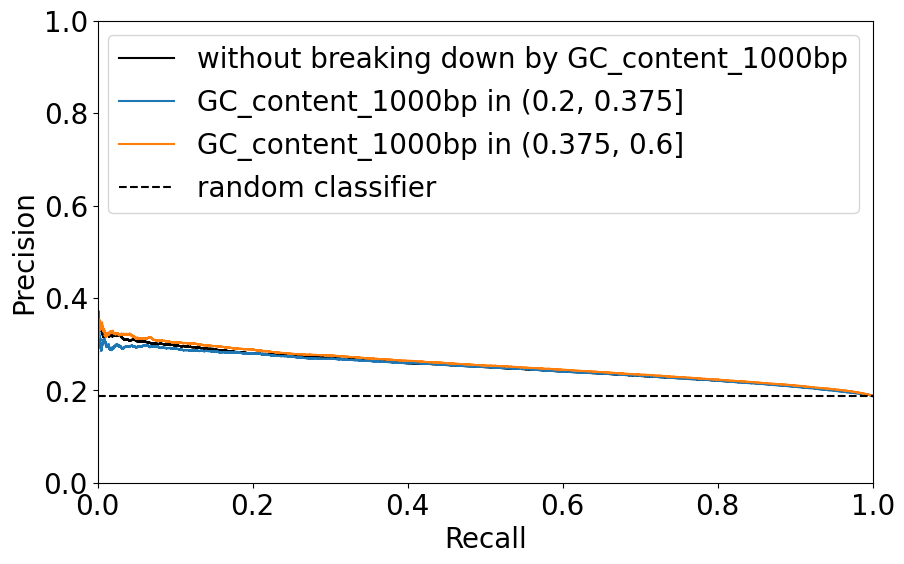

In [13]:
from sklearn.metrics import precision_recall_curve, auc

def compute_area(df, target, constraint_score, ax_pr=None, color=None, label=None): 
    targets, scores = df[target], df[constraint_score]
    precision, recall, _ = precision_recall_curve(targets, scores)
    if ax_pr: ax_pr.plot(recall, precision, linestyle='-', color=color, label=label) 
    return auc(recall, precision)

def compute_area_for_bin(df, feature, feature_bin, target, constraint_score, ax_pr=None, color=None, label=None): 
    df_bin = df[df[f'{feature}_bin'] == feature_bin]

    if len(df_bin) < THRESHOLD_BIN_SIZE: 
        raise ValueError(f'Number of windows in {feature_bin} too small: {len(df_bin)}')

    return compute_area(df_bin, target, constraint_score, ax_pr, color, label)

def compute_auPRCnorm_and_delta(constraint_score, df, feature, feature_bins, target, debug): 
    if len(feature_bins) != 2:
        raise ValueError('Only two feature bins allowed')

    df = shuffle_bin_downsample(df, feature, target, feature_bins)

    if debug: 
        fig, ax_pr = plt.subplots(figsize=(10, 6))
        area = compute_area(df, target, constraint_score, ax_pr, color='black', label=f'without breaking down by {feature}') 
        area_bin_0 = compute_area_for_bin(df, feature, feature_bins[0], target, constraint_score, ax_pr, color=None, label=f'{feature} in {feature_bins[0]}')
        area_bin_1 = compute_area_for_bin(df, feature, feature_bins[1], target, constraint_score, ax_pr, color=None, label=f'{feature} in {feature_bins[1]}')
    else:
        area = compute_area(df, target, constraint_score) # without breaking down by feature
        area_bin_0 = compute_area_for_bin(df, feature, feature_bins[0], target, constraint_score)
        area_bin_1 = compute_area_for_bin(df, feature, feature_bins[1], target, constraint_score)

    r = compute_positive_fraction(df, target)

    if debug: 
        ax_pr.plot([0, 1], [r, r], linestyle='--', color='black', label='random classifier') 
        ax_pr.set_xlabel('Recall')
        ax_pr.set_ylabel('Precision')
        ax_pr.set_xlim(0, 1)
        ax_pr.set_ylim(0, 1)
        ax_pr.legend()

    auPRCnorm = area/r
    delta = (area_bin_0 - area_bin_1)/area

    return auPRCnorm, delta

compute_auPRCnorm_and_delta(
    constraint_score='gnocchi',
    df=LAX_CHEN_WINDOWS, 
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    target='window overlaps enhancer', # proxy for constraint 
    debug=True
)

(np.float64(4.5747571680632895), np.float64(0.049742344833409245))

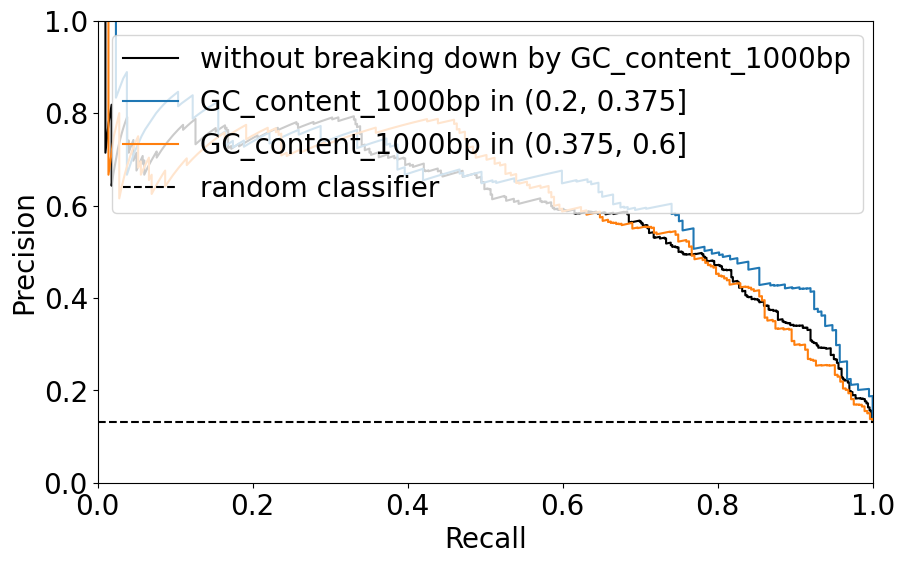

In [14]:
compute_auPRCnorm_and_delta(
    constraint_score='gnocchi',
    df=STRINGENT_WINDOWS, 
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    target='truly constrained',
    debug=True
)

(np.float64(1.0977285184387542), np.float64(0.009977892799570431))

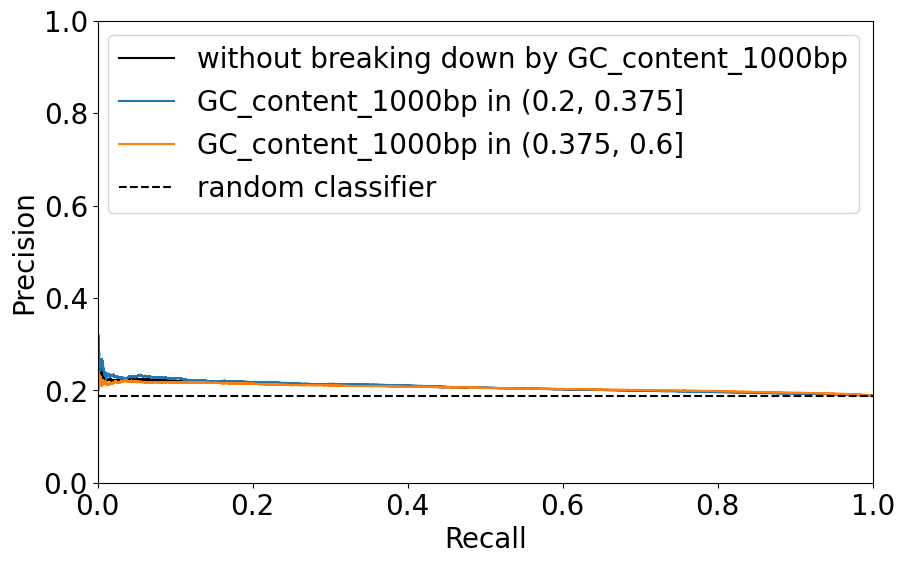

In [15]:
compute_auPRCnorm_and_delta(
    constraint_score='strong_selection', # lambda_s
    df=LAX_CHEN_WINDOWS_WITH_LAMBDA_S, 
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    target='window overlaps enhancer', # proxy for constraint
    debug=True
)

(np.float64(2.9248658149904467), np.float64(0.035796336144366066))

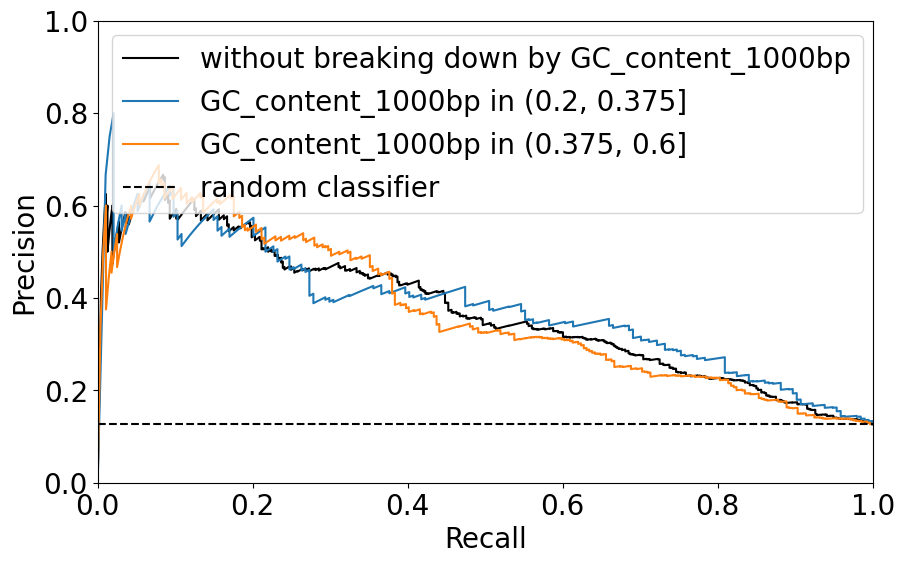

In [16]:
compute_auPRCnorm_and_delta(
    constraint_score='lambda_s',
    df=STRINGENT_WINDOWS, 
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    target='truly constrained',
    debug=True
)

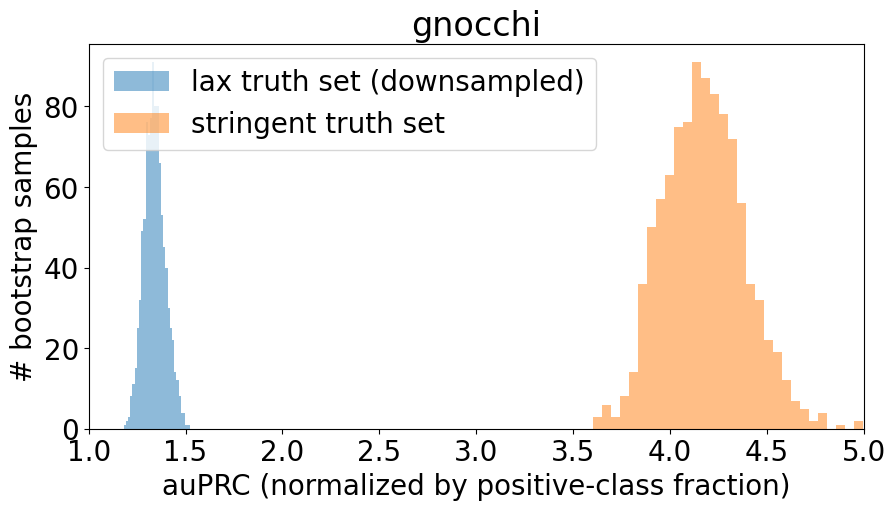

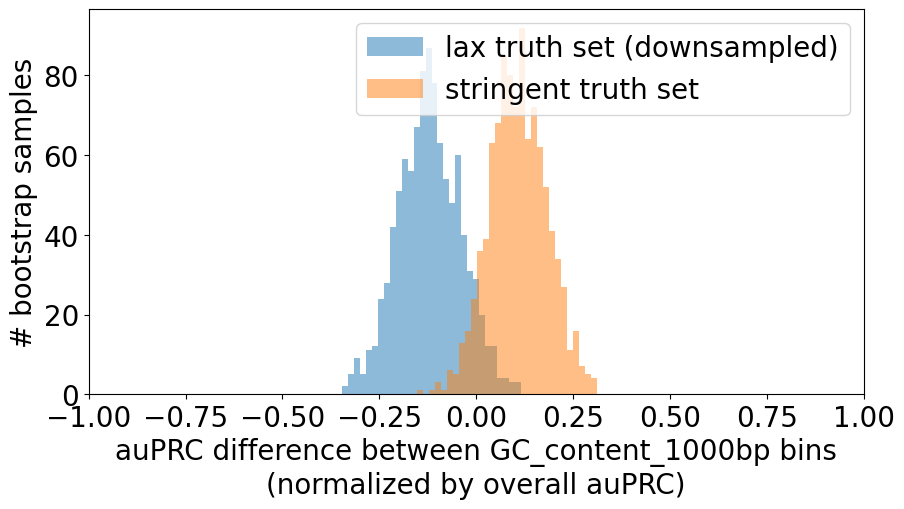

In [22]:
def plot_auPRCnorm_and_delta_distributions(ax_auPRCnorm, ax_delta, df, target, feature, feature_bins, constraint_score, label, hist_bins=30, number_bootstraps=1000): 
    auPRCnorms, deltas = [], []

    for _ in range(number_bootstraps):
        auPRCnorm, delta = compute_auPRCnorm_and_delta(constraint_score, df, feature, feature_bins, target, debug=False)
        auPRCnorms.append(auPRCnorm)
        deltas.append(delta)

    ax_auPRCnorm.hist(auPRCnorms, bins=hist_bins, label=label, alpha=0.5)    
    ax_delta.hist(deltas, bins=hist_bins, label=label, alpha=0.5)

def plot_auPRCnorm_and_delta_distributions_for_lax_vs_stringent_truth_set(feature, feature_bins, args): 
    fig_auPRCnorm, ax_auPRCnorm = plt.subplots(figsize=(10, 5))
    fig_delta, ax_delta = plt.subplots(figsize=(10, 5))

    plot_auPRCnorm_and_delta_distributions(
        ax_auPRCnorm=ax_auPRCnorm, 
        ax_delta=ax_delta, 
        df=args['df_lax'].sample(n=len(STRINGENT_WINDOWS), random_state=None),
        target='window overlaps enhancer',
        feature=feature,
        feature_bins=feature_bins,
        constraint_score=args['constraint_score_lax'],
        label='lax truth set (downsampled)',
    )

    plot_auPRCnorm_and_delta_distributions(
        ax_auPRCnorm=ax_auPRCnorm, 
        ax_delta=ax_delta, 
        df=STRINGENT_WINDOWS,
        target='truly constrained',
        feature=feature,
        feature_bins=feature_bins,
        constraint_score=args['constraint_score_stringent'],
        label='stringent truth set',
    )

    ax_auPRCnorm.set_title(f'{args["constraint_score_alias"]}')
    ax_auPRCnorm.set_xlabel('auPRC (normalized by positive-class fraction)')
    ax_auPRCnorm.set_ylabel('# bootstrap samples')
    ax_auPRCnorm.set_xlim(1, 5)
    ax_auPRCnorm.legend()

    ax_delta.set_xlabel(f'auPRC difference between {feature} bins\n(normalized by overall auPRC)')
    ax_delta.set_ylabel('# bootstrap samples')
    ax_delta.set_xlim(-1, 1)
    ax_delta.legend()

plot_auPRCnorm_and_delta_distributions_for_lax_vs_stringent_truth_set(
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    args=ARGS['gnocchi']
)

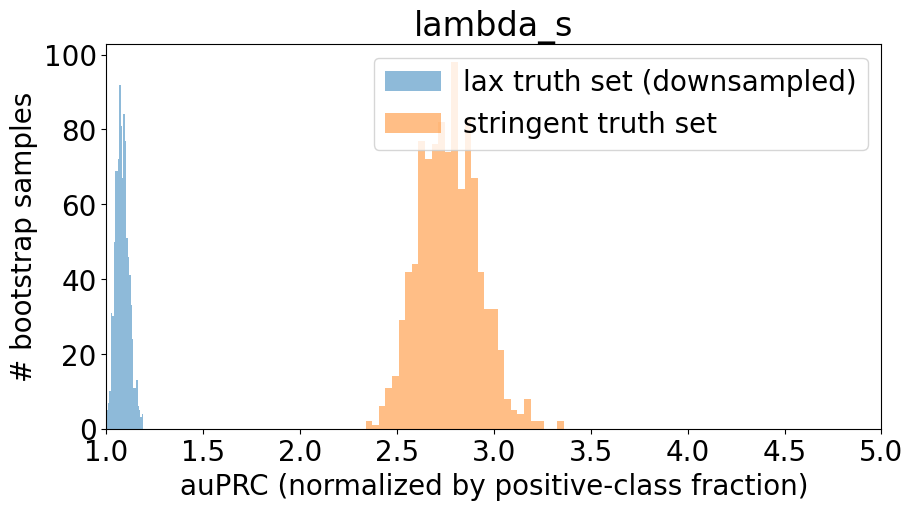

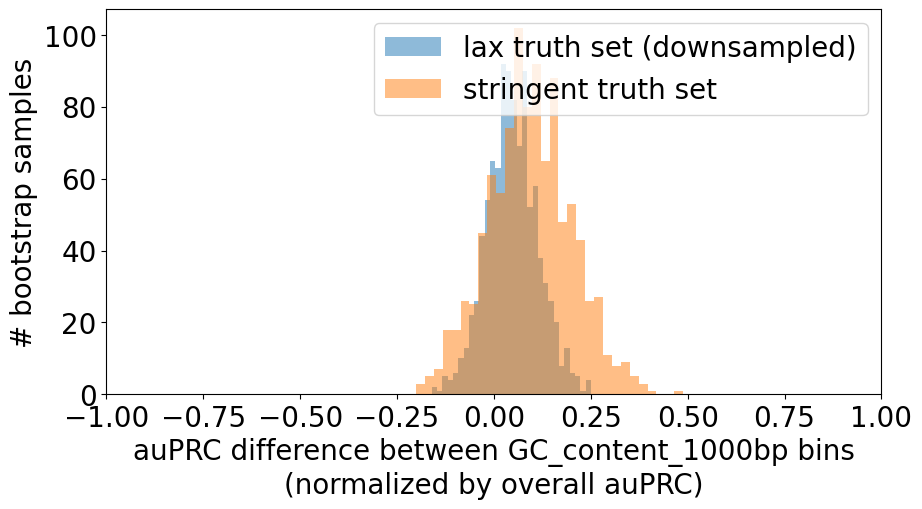

In [23]:
plot_auPRCnorm_and_delta_distributions_for_lax_vs_stringent_truth_set(
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    args=ARGS['lambda_s']
)

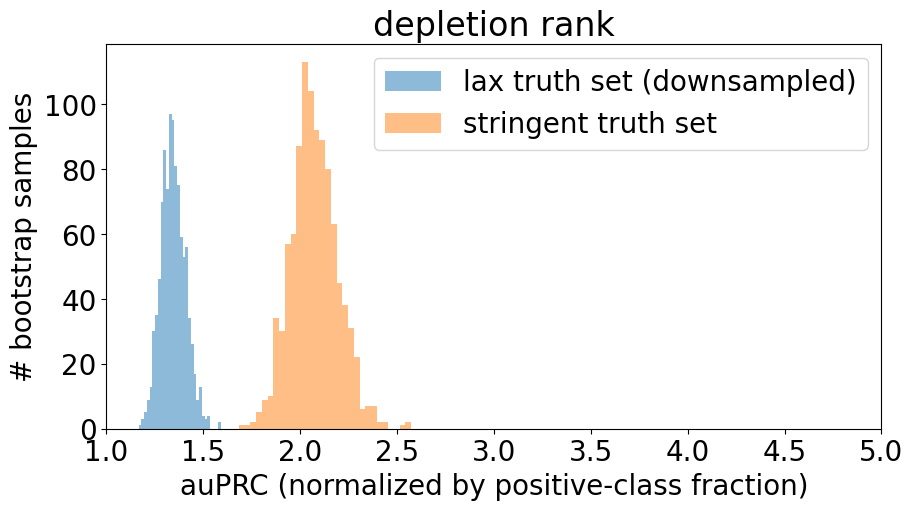

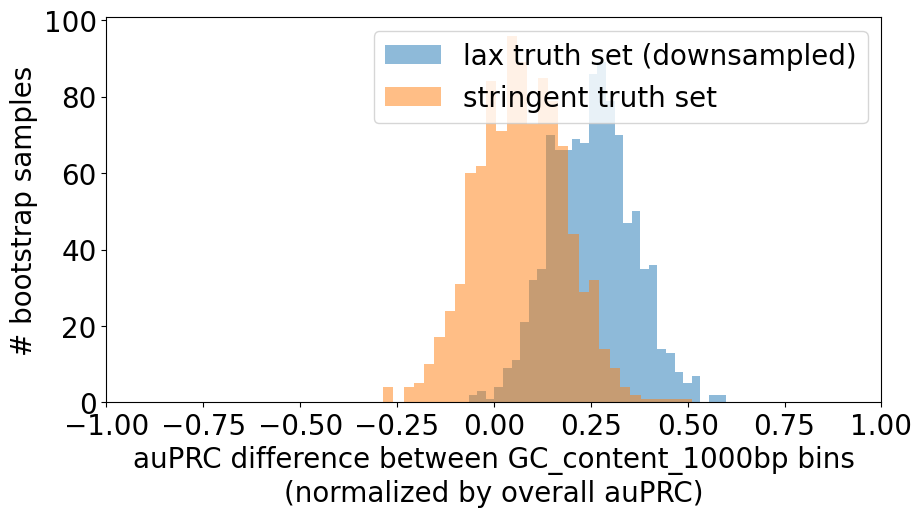

In [24]:
plot_auPRCnorm_and_delta_distributions_for_lax_vs_stringent_truth_set(
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    args=ARGS['depletion rank']
)

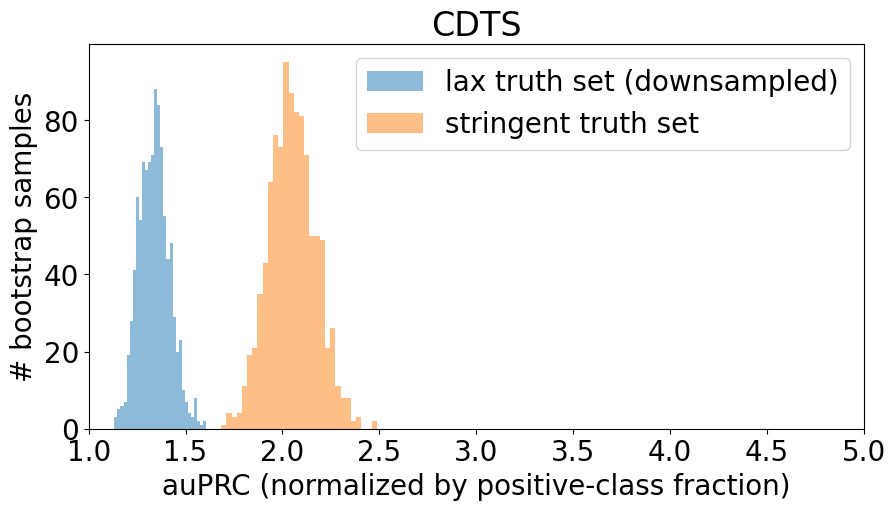

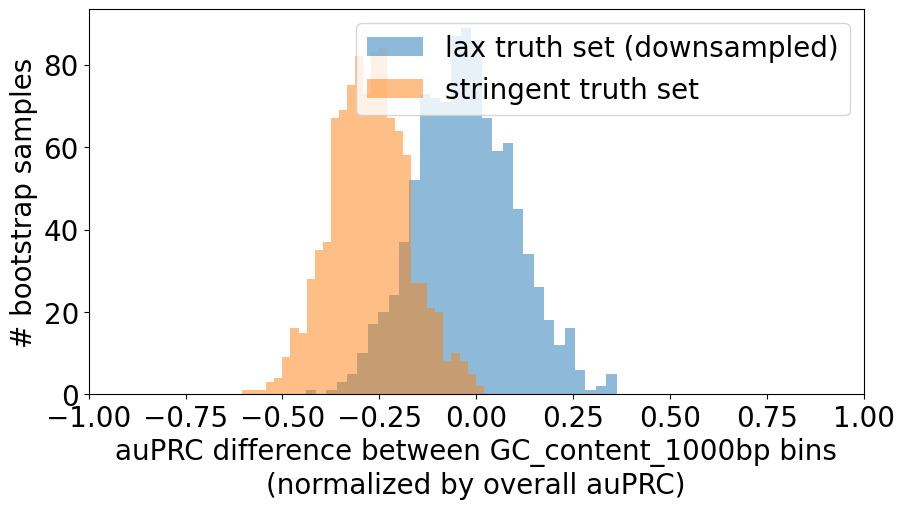

In [25]:
plot_auPRCnorm_and_delta_distributions_for_lax_vs_stringent_truth_set(
    feature='GC_content_1000bp',
    feature_bins=FEATURE_BINS_GC_CONTENT,
    args=ARGS['CDTS']
)